   ## library recruitment 
   

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

## Storing the data from outer file using Pandas 

In [2]:
housing=pd.read_csv("data.csv")
housing1 = np.array(housing)
#housing.head()

## Checks the data and feature


In [3]:
#housing.info()
#housing.head()
#housing.shape

#housing["ZN"].value_counts()
#housing.describe()
#housing.hist(bins=50, figsize=(20,30))
#plt.show()

## Take caring of missing Element(nul Blocks inside file)

##  There are three method to deal with nul block

# Method1 : By removing rows in which present any null values


In [4]:
housing_removing_by_rows=housing.dropna(subset=["MEDV"])
housing_removing_by_rows.shape

(452, 14)

# Method2 : By removing col in which present any null values

In [5]:
housing_removing_by_cols=housing.drop("MEDV",axis=1)
housing_removing_by_cols.shape

(506, 13)

In [6]:
from sklearn.impute import SimpleImputer

In [7]:
# Method3: By replacing null values with mean, median, most_frequent, constant

imputer=SimpleImputer(strategy="median")
a=imputer.fit(housing)

#a.statistics_  or imputer.statistics_

x=imputer.transform(housing)

housing_replace_by_median=pd.DataFrame(x,columns=housing.columns)
housing=housing_replace_by_median
#housing.info()
#housing_replace_by_median.info()

# Slicing the data for traing and testing

In [8]:
def split_train_test(data,test_ratio):
    shuffled=np.random.permutation(len(data))
    test_data=shuffled[:int(len(data)*test_ratio)]
    train_data=shuffled[int(len(data)*test_ratio):]
    return(data.iloc[train_data],data.iloc[test_data])
    
train_data1,test_data1=split_train_test(housing,0.2)


#train_data1_feature=train_data1[:14]
#train_data1_lebal=train_data1[14:]
#test_data1_feature=test_data1[:14]
#test_data1_lebal=test_data1[14:]

#print(test_data1)
#test_data1_lebal.head
#train_data1_lebal.head()


#  Using Sklearn.model_selection  split into train test 

In [9]:
train_data2,test_data2=train_test_split(housing,test_size=0.2,random_state=42)


#train_data2_feature=train_data2[:14]
#train_data2_lebal=train_data2[14:]
#test_data2_feature=test_data2[:14]
#test_data2_lebal=test_data2[14:]


#print(train_data2)
#test_data2.shape
#train_data2.shape
#train_data2_feature.head()

# Stratified split at CHAS feature

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

In [11]:
'''split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["CHAS"]):
    strat_train_set = house_data.loc[train_index]
    strat_test_set = house_data.loc[test_index]
'''


'split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)\n\nfor train_index, test_index in split.split(housing, housing["CHAS"]):\n    strat_train_set = house_data.loc[train_index]\n    strat_test_set = house_data.loc[test_index]\n'

#  Looking For Correlations

In [12]:
corr_matrix=housing.corr()
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
ZN         0.325159
B          0.193664
CHAS       0.085446
DIS       -0.021276
RM        -0.049154
PTRATIO   -0.064664
RAD       -0.074271
NOX       -0.087402
AGE       -0.200507
TAX       -0.232424
per cap   -0.268576
INDUS     -0.338593
LSTAT     -0.679044
Name: MEDV, dtype: float64

In [13]:
from pandas.plotting import scatter_matrix

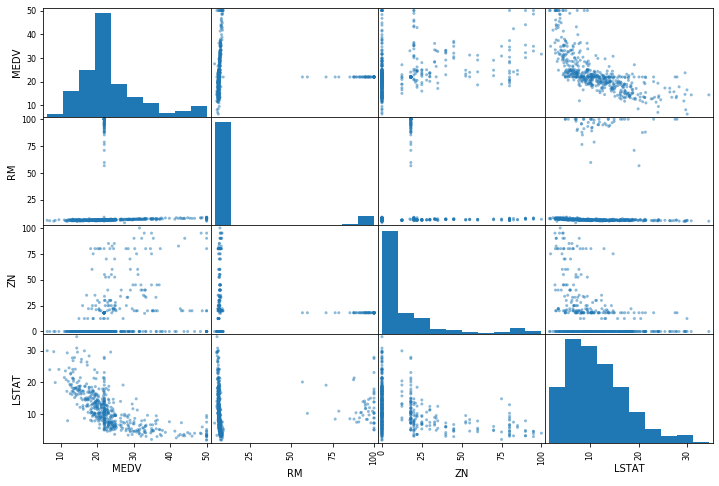

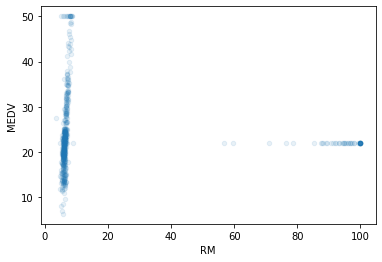

In [14]:
attributes=["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize=(12,8))
housing.plot(kind='scatter',x="RM",y="MEDV",alpha=0.1)

In [15]:
housing_feature=housing.drop("MEDV",axis=1)
housing_labels=housing["MEDV"].copy()
#housing_feature=train_data2.drop("MEDV",axis=1)
#housing_labels=train_data2["MEDV"].copy()

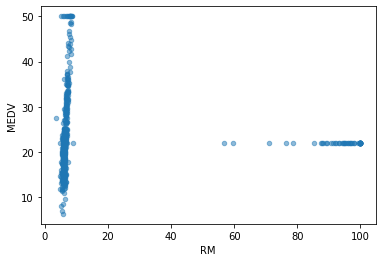

In [16]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.5)
plt.show()

# Feature Scaling

# There are two ways for feature scaling 

# 1. Min -Max Scaling(Normalization)

# 2. Standardization

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [18]:
my_pipeline=Pipeline([("imputer",SimpleImputer(strategy="median")),('std_scaler',StandardScaler()),])
housing_num_tr=my_pipeline.fit_transform(housing_feature)
housing_num_tr.shape

(506, 13)

#  Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [20]:
#model=LinearRegression()
#model=DecisionTreeRegressor()
model=RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [21]:
some_feature=housing_feature.iloc[1:5]
some_label=housing_labels.iloc[1:5]
some_data=my_pipeline.fit_transform(some_feature)
predect_data=model.predict(some_data)
print(predect_data)

[18.17459316 25.29908113 29.84910516 20.78913058]


In [22]:
print(some_label)

1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
housing_predictions=model.predict(housing_num_tr)
line_mse=mean_squared_error(housing_labels,housing_predictions)
lin_rmse=np.sqrt(line_mse)
print(lin_rmse)

4.660615629263716


In [59]:
housing_num_tr[6:8,:]

array([[-0.4926937 , -0.03453748, -0.18640843, -0.45051082, -0.35078919,
        -0.35552147,  0.23752726, -0.09466045, -0.35931399, -0.15689267,
        -0.31331888,  0.50167425,  0.14725254],
       [-0.46922107, -0.03453748, -0.18640843, -0.45051082, -0.35078919,
        -0.34963767,  1.12953879, -0.03438361, -0.35931399, -0.15689267,
        -0.31331888,  0.51205776,  1.25635818]])

# Using better evaluation technique- Cross Valitation

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [26]:
scores = cross_validate(model, housing_num_tr,housing_labels,cv=10,scoring=( 'r2','neg_mean_squared_error'),return_train_score=True)
print(scores['test_neg_mean_squared_error'])  

[-13.95059952  -8.69403066  -5.75744696 -36.35217514 -28.38515486
 -75.19017333 -19.614412   -89.69275816 -14.77569897 -16.84406666]


In [27]:
rmse_score=np.sqrt(-scores['test_neg_mean_squared_error'])


In [28]:
rmse_score

array([3.73505014, 2.94856417, 2.39946806, 6.0292765 , 5.32777204,
       8.67122675, 4.42881609, 9.47062607, 3.84391714, 4.10415237])

In [29]:
def print_score(rmse_score):
    print("Scores :")
    print("Mean: ",rmse_score.mean())
    print("SD: ",rmse_score.std())

In [30]:
print_score(rmse_score)

Scores :
Mean:  5.095886932070395
SD:  2.22656416953446


In [31]:
from joblib import dump,load
dump(model,'Real Estates.ipynb')

['Real Estates.ipynb']